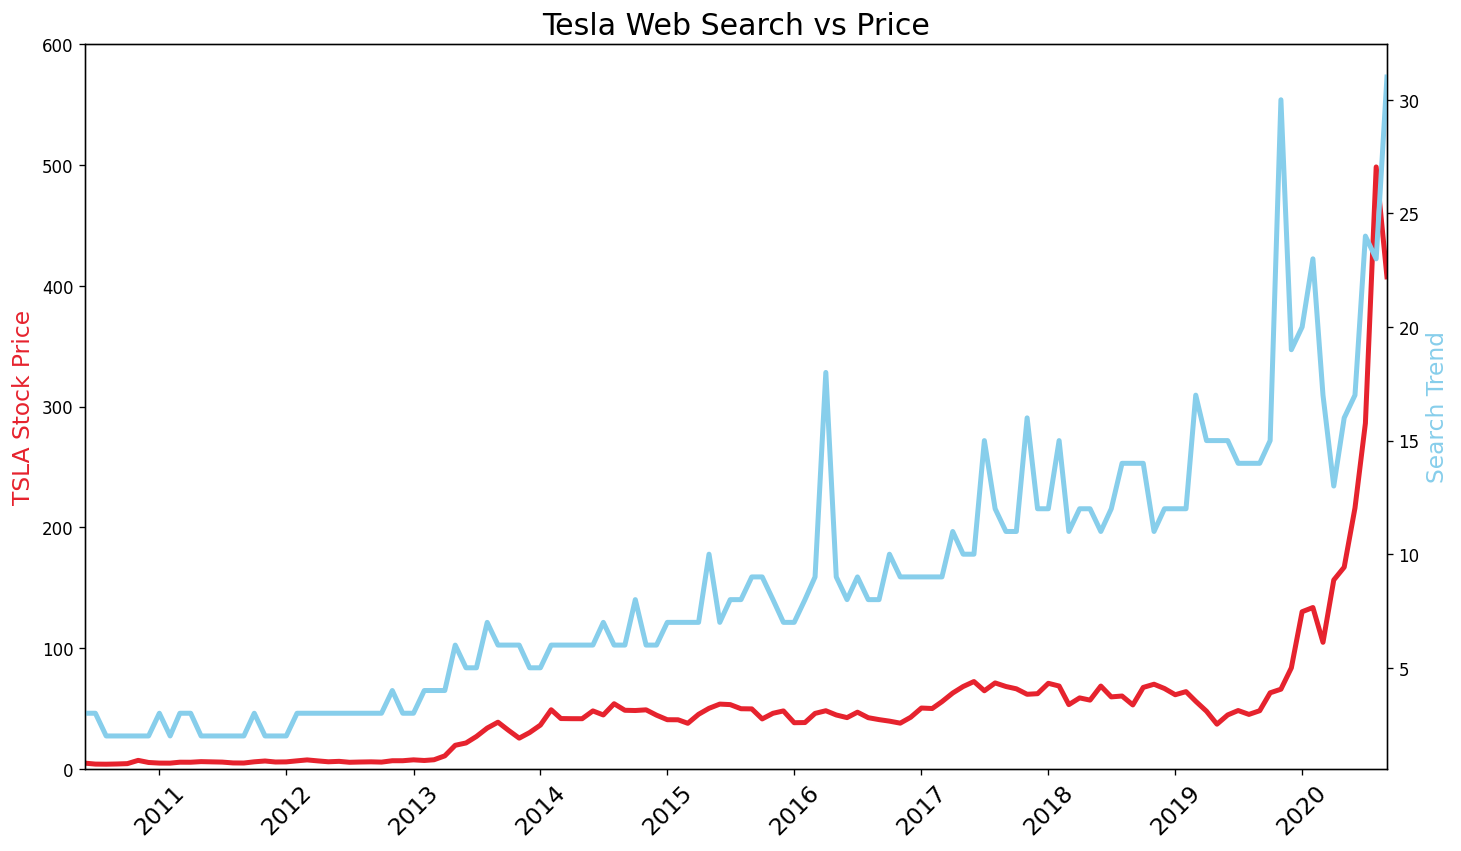

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,,
2004-01-31,2004-01-01,34,5.7
2004-02-29,2004-02-01,33,5.6
2004-03-31,2004-03-01,25,5.8
2004-04-30,2004-04-01,29,5.6
2004-05-31,2004-05-01,23,5.6


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

#----- Tesla DB -----#
# df_tesla.TSLA_WEB_SEARCH.max() #31
# df_tesla.TSLA_WEB_SEARCH.min() #2
# df_tesla.count() #124
# df_tesla.TSLA_USD_CLOSE.min() 3.896
# df_tesla.TSLA_USD_CLOSE.max() 498.320007

#----- UMP DB -----#
# df_ump.count() 181
# df_ump.UNRATE.max() 10.0
# df_ump.UNRATE.min() 3.7


# df_btc_price.isna().values.sum() #True

# df_btc_price = df_btc_price.dropna(inplace=True)

df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_tesla.MONTH.head()
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
df_unemployment_monthly = df_unemployment.resample('M', on='MONTH').last()


plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)



plt.show()
df_btc_price.CLOSE.max()
df_unemployment_monthly.head()

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
 
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()


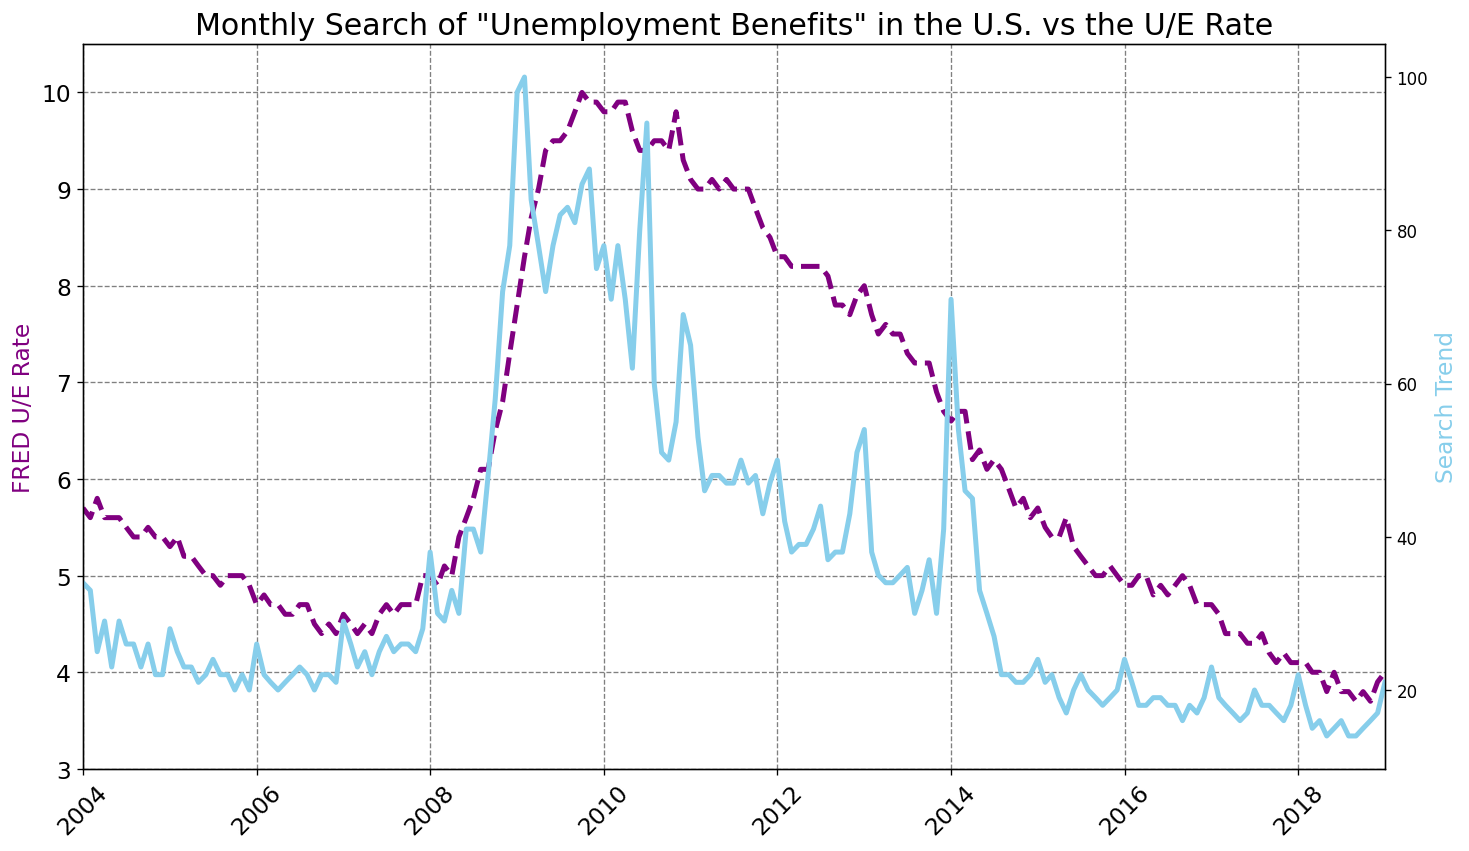

In [82]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')
 
# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()


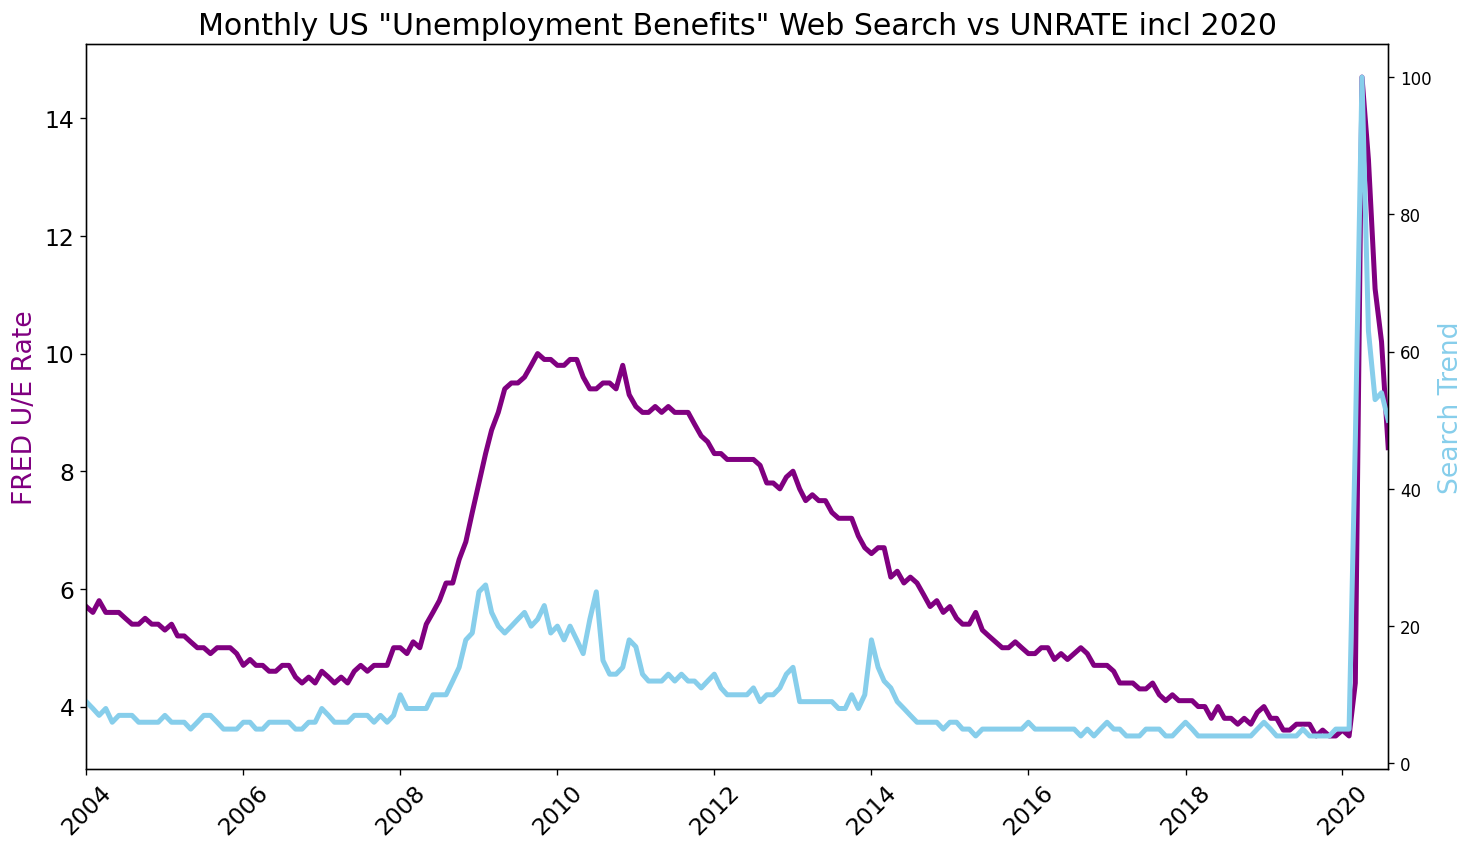

In [83]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()